## Importation

In [8]:
import pickle
import pandas as pd # data science library to manipulate data
import numpy as np # mathematical library to manipulate arrays and matrices
import matplotlib.pyplot as plt # visualization library
from sklearn.feature_selection import SelectKBest # selection method
from sklearn.feature_selection import mutual_info_regression,f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import  linear_model

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import  metrics
from sklearn.neural_network import MLPRegressor


In [9]:
# regions=['Auvergne-Rhône-Alpes']
regions=['Auvergne-Rhône-Alpes','Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']


## Load Data and Models

In [10]:
with open('data/power&meteo.pkl','rb') as file:
    (df_power,df_meteo,df_merged)=pickle.load(file)

for region in regions:
    # df_merged[region]=df_merged[region].drop_duplicates(subset=['Consommation-1'])
    df_consommation_1 = df_merged[region]['Consommation-1'].copy()

    df_merged[region] = df_merged[region].drop(columns=['Consommation-1'])

    df_merged[region]['Consommation-1'] = df_consommation_1.iloc[:, [0]]

for region in regions:
    df_meteo[region]['Hour'] = df_meteo[region].index.hour
    df_power[region].replace({'-': 0}, inplace=True)

In [11]:
ss_Y_cons={}
ss_X_cons={}
features_names_cons={}
model_cons={}

for region in regions:
    with open('models/'+region+'RFcons.pkl','rb') as file:
        model_cons[region],ss_Y_cons[region], ss_X_cons[region],features_names_cons[region]=pickle.load(file)

In [12]:
ss_Y_prod={}
ss_X_prod={}
features_names_prod={}
model_prod={}

for region in regions:
    with open('models/'+region+'RFprod.pkl','rb') as file:
        model_prod[region],ss_Y_prod[region], ss_X_prod[region],features_names_prod[region]=pickle.load(file)

In [13]:
print(features_names_prod[region])

Index(['Thermique-1', 'Eolien-1', 'Hour', 'Vitesse du vent moyen 10 mn',
       'Rafale sur les 10 dernières minutes', 'Humidité', 'Solaire-1',
       'Variation de pression en 3 heures',
       'Variation de pression en 24 heures', 'Visibilité horizontale',
       'Point de rosée', 'Direction du vent moyen 10 mn', 'Température',
       'Bioénergies-1', 'Température (°C)'],
      dtype='object')


## Load Model and use it

In [14]:
# faire difference entre variables issues de Meteo ou de Power (conso-1)
# rajouter un if

In [15]:
# # regions=['Auvergne-Rhône-Alpes']
# regions=['Auvergne-Rhône-Alpes','Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']

# def predict_next_hour_cons(region,
#                       date,
#                       df_met=df_meteo,
#                       df_pow=df_power,
#                       power=df_power[region].loc[date_test, 'Consommation']):
    

#     date = pd.to_datetime(date)
#     date1 = date + pd.Timedelta(hours=3)
#     X_now=[power]
#     for feature in features_names_cons[region][1:]:
#         if feature in df_met[region].columns :
#             X_now.append(df_met[region].loc[date1,feature])
#         elif feature[:-2] in df_pow[region].columns :
#             X_now.append(df_pow[region].loc[date,feature[:-2]])
#     X_now=np.array([[float(k) for k in X_now]])
   
#     y_pred_ss = model_cons[region][0].predict(ss_X_cons[region].transform(X_now))

#     y_pred=ss_Y_cons[region].inverse_transform(y_pred_ss.reshape(-1,1))
#     return y_pred[0,0]
    
# regions=['Auvergne-Rhône-Alpes','Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']

# date_test='2022-07-19 00:00:00'
# for region in regions:
#     print(predict_next_hour_cons(region,date=date_test))

In [16]:
# regions=['Auvergne-Rhône-Alpes']
regions=['Auvergne-Rhône-Alpes','Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']
date_test='2022-07-19 00:00:00'
def predict_next_hour_cons(region,
                      date,
                      df_met=df_meteo,
                      df_pow=df_power,
                      power_input={'Consommation-1':df_power[region].loc[date_test, 'Consommation']}):
    power=power_input
    date = pd.to_datetime(date)
    date1 = date + pd.Timedelta(hours=3)
    X_now=[]
    k=0
    power['list_pow']=[]
    for feature in features_names_cons[region]:
        if feature in df_met[region].columns :
            X_now.append(df_met[region].loc[date1,feature])
        # elif feature[:-2] in df_pow[region].columns :
        #     X_now.append(df_pow[region].loc[date,feature[:-2]])
        else:
            X_now.append(power[feature])
            power['list_pow'].append([feature,k])
        k=k+1
    
    X_now=np.array([[float(k) for k in X_now]])
    

   
    y_pred_ss = model_cons[region][0].predict(ss_X_cons[region].transform(X_now))

    y_pred=ss_Y_cons[region].inverse_transform(y_pred_ss.reshape(-1,1))
    for i in np.array(power['list_pow']):
        # name_feature = i[0]
        # print(i[0][1])
        power[i[0]] = y_pred[0][0]#[i[1]]
    

    
    return y_pred[0,0]
    
# regions=['Auvergne-Rhône-Alpes']#,'Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']

date_test='2022-07-19 00:00:00'
for region in regions:
    print(predict_next_hour_cons(region,date=date_test,power_input={'Consommation-1':df_power[region].loc[date_test, 'Consommation']}))

5975.64523015774
1856.8859503152025
2296.3927907631432
2702.0048543689322
4092.2946376377254
4672.072348670389
6577.9017750107105
2649.789456928954
4661.116616958167
4199.961331897398
4462.989384667636
2780.131852639336


In [17]:
# probleme
# on ne pourra pas réutiliser les valeurs calculés juste avant 

In [18]:
# Tres bon code mais ne met pas a jour la valeur de power donc reprend la valeur du dictionnaire

# regions=['Auvergne-Rhône-Alpes']
regions=['Auvergne-Rhône-Alpes','Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']

def predict_next_hour_consbof(region,
                      date,
                      df_met=df_meteo,
                      df_pow=df_power):
   
    date = pd.to_datetime(date)
    date1 = date + pd.Timedelta(hours=3)
    X_now=[]
    for feature in features_names_cons[region]:
        if feature in df_met[region].columns :
            X_now.append(df_met[region].loc[date1,feature])
        elif feature[:-2] in df_pow[region].columns :
            X_now.append(df_pow[region].loc[date,feature[:-2]])
    X_now=np.array([[float(k) for k in X_now]])
   
    y_pred_ss = model_cons[region][0].predict(ss_X_cons[region].transform(X_now))

    y_pred=ss_Y_cons[region].inverse_transform(y_pred_ss.reshape(-1,1))
    return y_pred[0,0]
    
regions=['Auvergne-Rhône-Alpes','Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']

date_test='2022-07-19 00:00:00'
for region in regions:
    print(predict_next_hour_cons(region,date=date_test))

4327.891786019433
3686.832284452126
3482.33267929037
2702.0048543689322
3224.6104199312563
3969.8428199107266
4682.071929053084
4364.732546538447
4232.723828169936
4031.6081914793717
3909.1998204531137
3711.7253722785636


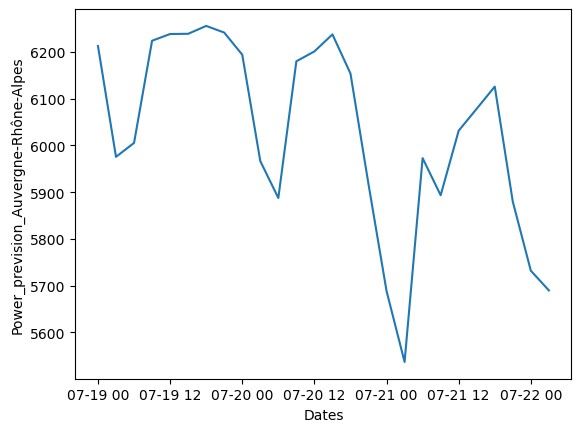

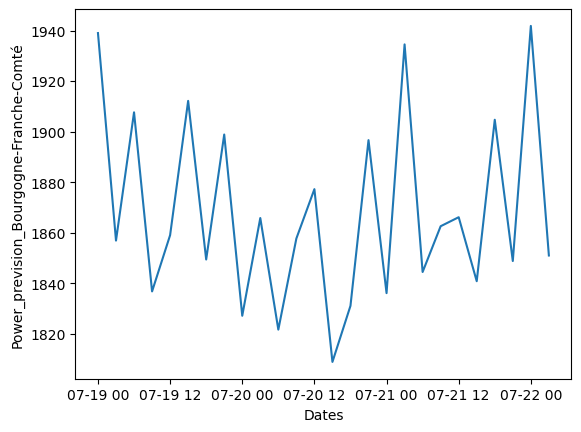

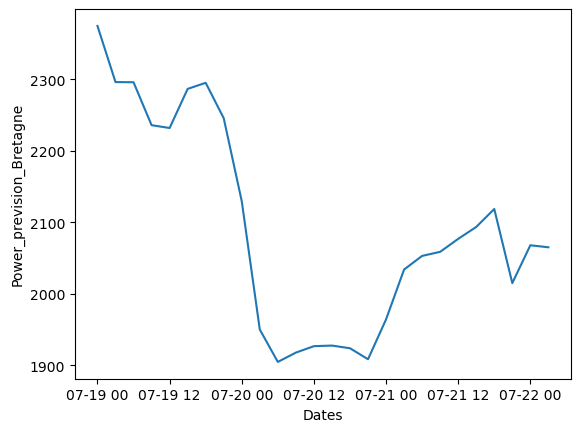

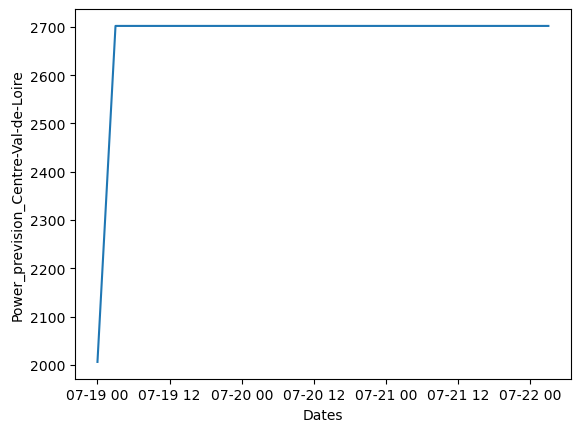

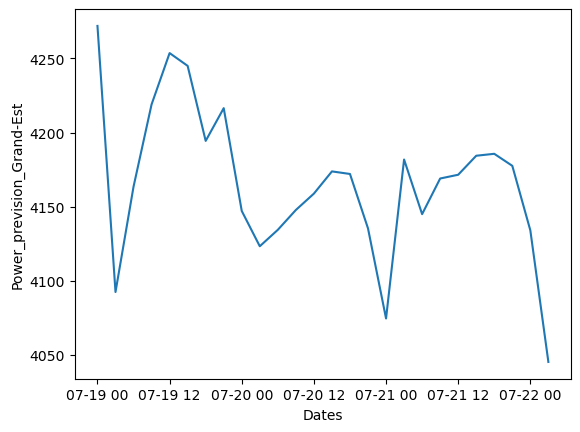

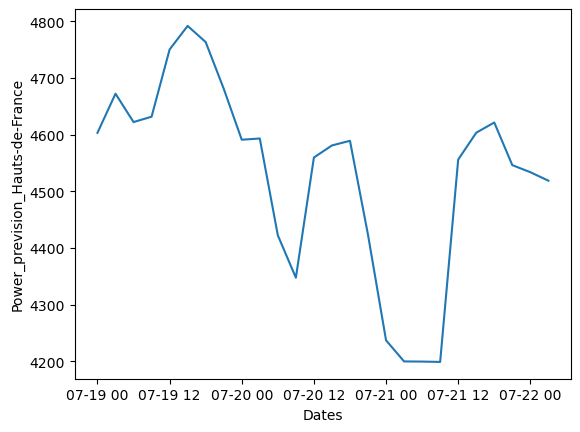

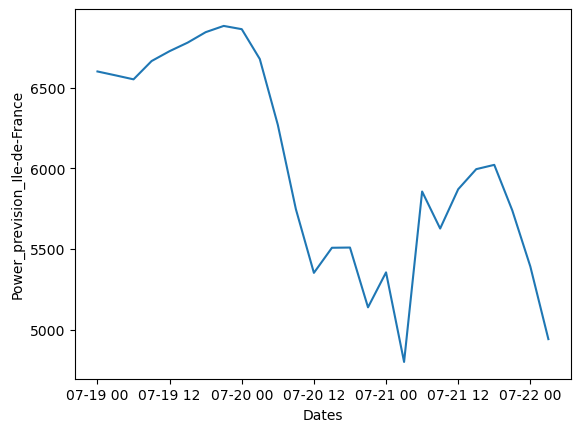

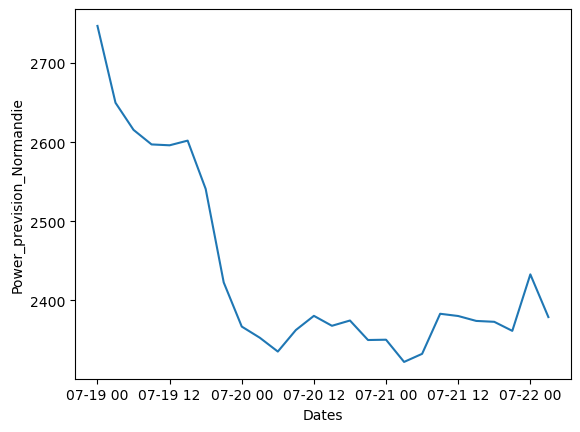

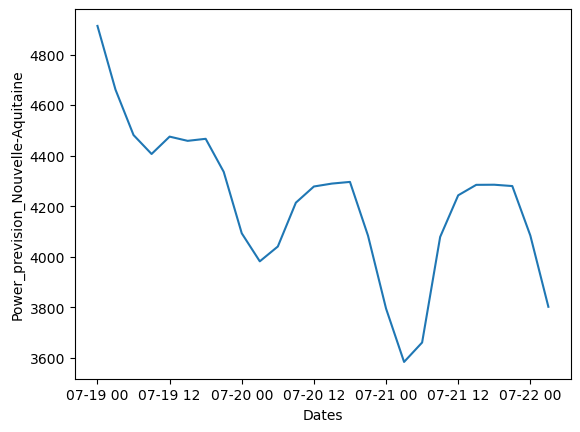

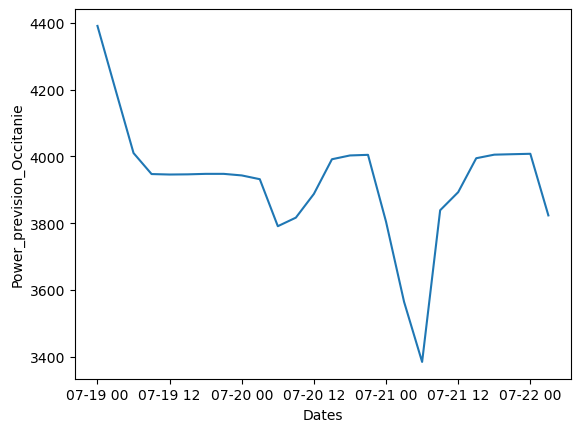

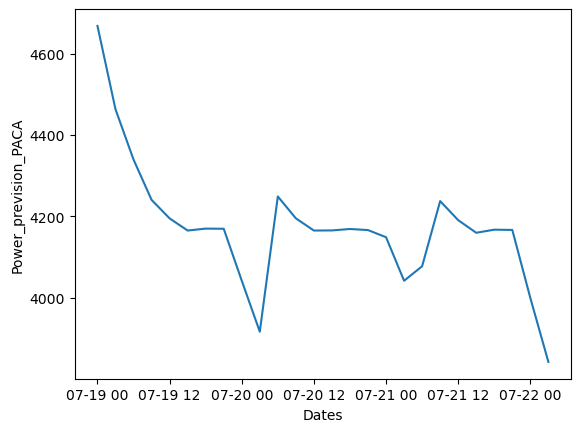

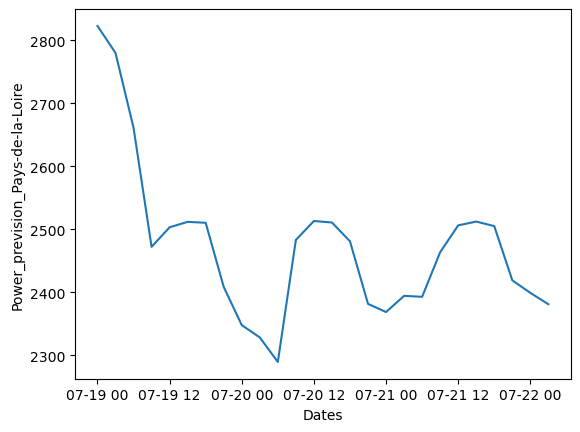

In [19]:
def predict_next_day_cons(region,
                    date,
                    df_met=df_meteo,
                    df_pow=df_power):
    
    date = pd.to_datetime(date)
    date1 = date + pd.Timedelta(hours=3)
    date1_end = date1 + pd.Timedelta(days=3)

    next_day = pd.date_range(start=date, end=date1_end, freq='3H')

    Yp=[df_pow[region].loc[date, 'Consommation']]
    for current_date in next_day:
        power=Yp[-1]   
        # prev = predict_next_hour_consbof(region=region,date=current_date)#,power=power)

        prev=predict_next_hour_cons(region=region,date=current_date,power_input={'Consommation-1':power})
        Yp=np.append(Yp, prev)
            
    return [float(k) for k in Yp[:-1]],next_day


date_test='2022-07-19 00:00:00'
# regions=['Ile-de-France']
for region in regions:
    # print(predict_next_day_cons(region,date_test))

    plt.plot(predict_next_day_cons(region,date_test)[1], predict_next_day_cons(region,date_test)[0])
    plt.xlabel('Dates')
    plt.ylabel('Power_prevision_'+region)
    plt.show()

In [20]:
# regions=['Auvergne-Rhône-Alpes']
# regions=['Auvergne-Rhône-Alpes','Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']

def predict_next_hour_prod(region,date,power_input,
                            df_met=df_meteo,
                            df_pow=df_power):
    power=power_input
    date = pd.to_datetime(date)
    date1 = date + pd.Timedelta(hours=3)
    X_now=[]
    # k=0
    power['list_pow']=[]
    for feature in features_names_prod[region]:
        k=0
        if feature in df_met[region].columns :
            X_now.append(df_met[region].loc[date1,feature])
        # elif feature[:-2] in df_pow[region].columns :
        #     X_now.append(df_pow[region].loc[date,feature[:-2]])
        else:
            X_now.append(power[feature])
            power['list_pow'].append([feature,k])
        k=k+1
    
    X_now=np.array([[float(k) for k in X_now]])
    

   
    y_pred_ss = model_prod[region][0].predict(ss_X_prod[region].transform(X_now))

    y_pred=ss_Y_prod[region].inverse_transform(y_pred_ss)#.reshape(-1,1))
    for i in np.array(power['list_pow']):
        # name_feature = i[0]
        # place du feature dans xnow = i[1] 
        # print(i[0][1])
        # power[i[0]] = y_pred[0][i[1]]
        # i[1]=int(i[1])
        # print(power[i[0]])
        # print(i)
        # print(y_pred[0][int(i[1])])
        power[i[0]] = y_pred[0][int(i[1])]
    
    return y_pred[0],power
    
# regions=['Auvergne-Rhône-Alpes']#,'Bourgogne-Franche-Comté','Bretagne','Centre-Val-de-Loire','Grand-Est','Hauts-de-France','Ile-de-France','Normandie','Nouvelle-Aquitaine','Occitanie','PACA','Pays-de-la-Loire']

power_inputt={'Thermique-1':df_power[region].loc[date_test, 'Thermique'],
             'Nucléaire-1':df_power[region].loc[date_test, 'Nucléaire'],
             'Eolien-1':df_power[region].loc[date_test, 'Eolien'],
             'Solaire-1':df_power[region].loc[date_test, 'Solaire'],
             'Hydraulique-1':df_power[region].loc[date_test, 'Hydraulique'],
             'Bioénergies-1':df_power[region].loc[date_test, 'Bioénergies'],
             'Pompage-1':df_power[region].loc[date_test, 'Pompage']}
date_test='2022-07-19 00:00:00'
for region in regions:
    print(predict_next_hour_prod(region,date=date_test,power_input=power_inputt)[0])


[  177. 10235.   309.     0.  1798.     0.   125.]
[159.   0. 157.  87. 286.   0.  50.]
[422.   0.  79. 255. 204.   0.  45.]
[  12. 6317.   86.   69.   14.    0.   70.]
[1226. 3745.  168.    0.  590. -345.   83.]
[9.460e+02 1.761e+03 2.230e+02 2.540e+02 1.000e+00 0.000e+00 1.100e+02]
[605.   0.  65.  18.  26.   0. 109.]
[ 238. 4915.  769.  132.   22.    0.   64.]
[ 246. 2964.  304.    0.  141.    0.  184.]
[ 112.  399.   72.  611.  810. -674.  181.]
[ 13.   0.  61.   0. 325.   0.  62.]
[ 59.   0. 174.   0.   1.   0.  42.]


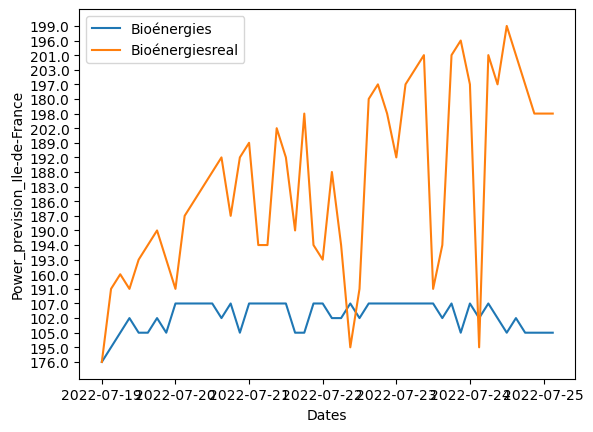

In [21]:
def predict_next_day_prod(region,
                    date,
                    df_met=df_meteo,
                    df_pow=df_power):
    
    date = pd.to_datetime(date)
    date1 = date + pd.Timedelta(hours=3)
    date1_end = date1 + pd.Timedelta(days=6)
    real_power=[]

    next_day = pd.date_range(start=date, end=date1_end, freq='3H')
    power={'Thermique-1':df_pow[region].loc[date, 'Thermique'],
             'Nucléaire-1':df_pow[region].loc[date, 'Nucléaire'],
             'Eolien-1':df_pow[region].loc[date, 'Eolien'],
             'Solaire-1':df_pow[region].loc[date, 'Solaire'],
             'Hydraulique-1':df_pow[region].loc[date, 'Hydraulique'],
             'Bioénergies-1':df_pow[region].loc[date, 'Bioénergies'],
             'Pompage-1':df_pow[region].loc[date, 'Pompage']}

    Yp=[[df_pow[region].loc[date, k] for k in ['Thermique','Nucléaire','Eolien','Solaire','Hydraulique','Pompage','Bioénergies']]]
    
    for current_date in next_day:
        # power=Yp[-1]   

        # prev=predict_next_hour_prod(region=region,date=current_date,power_input={'Consommation-1':power})
        prev,power=predict_next_hour_prod(region,date=current_date,power_input=power,df_met=df_meteo,df_pow=df_power)
        # Yp=np.append(Yp, prev)
        Yp.append(prev)
        real_power.append([df_pow[region].loc[current_date, k] for k in ['Thermique','Nucléaire','Eolien','Solaire','Hydraulique','Pompage','Bioénergies']])
    Yp=np.array(Yp)
    for k in range(Yp.shape[0]):
        for i in range(Yp.shape[1]):
            Yp[k][i]=float(Yp[k,i]) 
    real_power=np.array(real_power)
    for k in range(real_power.shape[0]):
        for i in range(real_power.shape[1]):
            real_power[k][i]=float(real_power[k,i])   
    
    return Yp[:-1, :],next_day,np.array(real_power)


date_test='2022-07-19 00:00:00'
regions=['Ile-de-France']
for region in regions:
    # print(predict_next_day_prod(region,date_test))
    for j in range(predict_next_day_prod(region,date_test)[0].shape[1]):
        j=6

        plt.plot(predict_next_day_prod(region,date_test)[1], predict_next_day_prod(region,date_test)[0][:, j],label=['Thermique','Nucléaire','Eolien','Solaire','Hydraulique','Pompage','Bioénergies'][j])
    
        plt.plot(predict_next_day_prod(region,date_test)[1], predict_next_day_prod(region,date_test)[2][:, j],label=['Thermique','Nucléaire','Eolien','Solaire','Hydraulique','Pompage','Bioénergies'][j]+'real')
        break
    plt.xlabel('Dates')
    plt.ylabel('Power_prevision_'+region)
    plt.legend()
    plt.show()